In [1]:
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# load the predictions
# teacher predictions
teacher_mcd_results = {'1': None, '10': None, '20': None, '30': None, '40': None, '50': None}
for k in teacher_mcd_results.keys():
    with open(f'../out/bert_teacher/final_e3_lr2_hd020_ad020_cd030/results/results_{k}.json', 'r') as f:
        teacher_mcd_results[k] = json.load(f)
    
# student predictions - possible condidates for best student model
# shen=0.5, lr=0.0002, e=2;
# shen=1, lr=0.000002, e=4
# shen=2, lr=0.0002, e=4 <-- current choice, also best in terms of AUC
# shen=2, lr=0.00002, e=2
with open('../out/bert_student/m5_k10/shen_2_lr0.0002_e4/results/results.json', 'r') as f:
    student_mcd_results = json.load(f)

In [33]:
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["font.family"] = "serif"

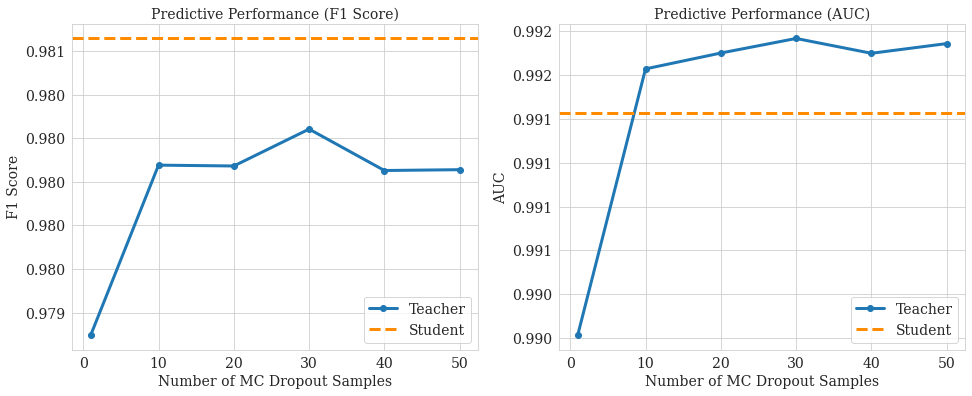

In [34]:
from matplotlib.ticker import StrMethodFormatter

# plot teacher f1 score vs k and auc score vs k
plt.subplots(1, 2, figsize=(16, 6))
# plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))

# add grid
plt.grid(True)
teacher_f1 = [teacher_mcd_results[k]['f1_score'] for k in teacher_mcd_results.keys()]
teacher_k = [int(k) for k in teacher_mcd_results.keys()]
plt.plot(teacher_k, teacher_f1, 'o-', lw=3, label='Teacher')
# plt.ylim(0.978, 0.99)
plt.xlabel('Number of MC Dropout Samples')
plt.ylabel('F1 Score')
plt.title('Predictive Performance (F1 Score)')
# add student f1 score
plt.axhline(student_mcd_results['f1_score'], color='darkorange', linestyle='--', lw=3, label='Student')
plt.legend()

plt.subplot(1, 2, 2)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))

# add grid
plt.grid(True)
teacher_f1 = [teacher_mcd_results[k]['auc_score'] for k in teacher_mcd_results.keys()]
teacher_k = [int(k) for k in teacher_mcd_results.keys()]
plt.plot(teacher_k, teacher_f1, 'o-', lw=3, label='Teacher')
# plt.ylim(0.978, 0.99)
plt.xlabel('Number of MC Dropout Samples')
plt.ylabel('AUC')
plt.title('Predictive Performance (AUC)')
# add student f1 score
plt.axhline(student_mcd_results['auc_score'], color='darkorange', linestyle='--', lw=3, label='Student')
plt.legend();

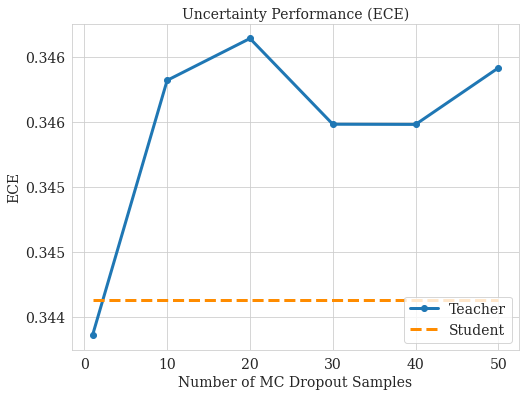

In [35]:
# plot teacher ece score vs k
plt.figure(figsize=(8, 6))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))

# add grid
plt.grid(True)
teacher_f1 = [teacher_mcd_results[k]['ece_score'] for k in teacher_mcd_results.keys()]
teacher_k = [int(k) for k in teacher_mcd_results.keys()]
plt.plot(teacher_k, teacher_f1, 'o-', lw=3, label='Teacher')
plt.xlabel('Number of MC Dropout Samples')
plt.ylabel('ECE')
plt.title('Uncertainty Performance (ECE)')
# plt.ylim(0.34, 0.35)
# add student ece score
student_ece = student_mcd_results['ece_score']
xmin = min(teacher_k)
xmax = max(teacher_k)
plt.hlines(student_ece, xmin, xmax, colors='darkorange', linestyles='--', lw=3, label='Student')
plt.legend();

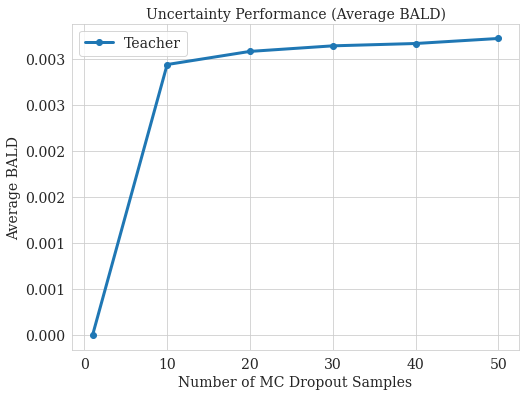

In [7]:
# plot teacher avg bald score vs k
plt.figure(figsize=(8, 6))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))

# add grid
plt.grid(True)
teacher_avg_bald = [teacher_mcd_results[k]['avg_bald'] for k in teacher_mcd_results.keys()]
teacher_k = [int(k) for k in teacher_mcd_results.keys()]
plt.plot(teacher_k, teacher_avg_bald, 'o-', lw=3, label='Teacher')
plt.xlabel('Number of MC Dropout Samples')
plt.ylabel('Average BALD')
plt.title('Uncertainty Performance (Average BALD)')
# add student ece score
student_avg_bald = np.mean(student_mcd_results['bald_score'])
xmin = min(teacher_k)
xmax = max(teacher_k)
# plt.hlines(student_ece, xmin, xmax, colors='darkorange', linestyles='--', lw=3, label='Student')
plt.legend();

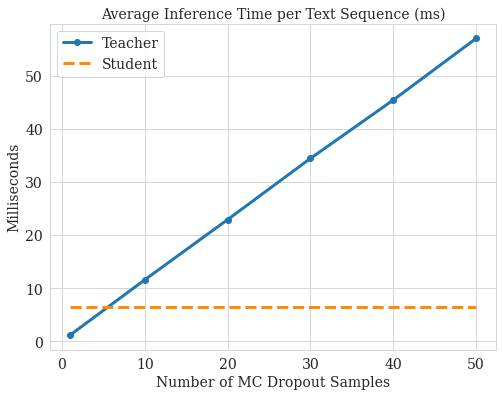

In [8]:
# plot teacher avg inference time score vs k
plt.figure(figsize=(8, 6))

# add grid
plt.grid(True)
teacher_f1 = [teacher_mcd_results[k]['average_inference_time'] for k in teacher_mcd_results.keys()]
teacher_k = [int(k) for k in teacher_mcd_results.keys()]
plt.plot(teacher_k, teacher_f1, 'o-', lw=3, label='Teacher')
plt.xlabel('Number of MC Dropout Samples')
plt.ylabel('Milliseconds')
plt.title('Average Inference Time per Text Sequence (ms)')
# add student avg inference time
student_avg_time = student_mcd_results['average_inference_time']
xmin = min(teacher_k)
xmax = max(teacher_k)
plt.hlines(student_avg_time, xmin, xmax, colors='darkorange', linestyles='--', lw=3, label='Student')
plt.legend();

student has slight overhead due to MC sampling from logits